# Bayesian Classification

*Youfei Zhang*

This notebook contains implementation of **Maximum Likelihood Estimator (MLE)** and **Maximum A Posterior (MAP)** classifiers. Those two classifiers are used to to label online shoppers based on their purchase history. 

### Dataset

The dataset is given in matlab format. For each matrix, each row is one example data point. 

The 1st column represents the class label of each shopper, those class labels are: 
* minor - 1
* young adult/teen - 2
* middle-aged adult - 3
* senior citizen - 4

The 2nd column represents a single feaure 'amountAlcohol", which represent the number of time the shopper has ordered alcohol in the past month. 


In [1]:
import scipy.io
varIn = scipy.io.loadmat('hw1data.mat')
trainData = varIn['trainData']
testData = varIn['testData']
trainData

array([[ 3, 10],
       [ 4, 12],
       [ 4, 13],
       ...,
       [ 3,  9],
       [ 3, 12],
       [ 1,  7]], dtype=uint8)

In [2]:
import pandas as pd 
train = pd.DataFrame(trainData).rename(index=str, columns={0:"label", 1:"amountAlcohol"})
train.head()

,label,amountAlcohol
0,3,10
1,4,12
2,4,13
3,2,9
4,1,3


**Assume a standard deviation of $\sigma$ = 2** <br>
The mean $\mu$ is the average amount of alcohol for each class (shopper) <br>

1) check if the likelihood is Gaussian <br>
2) Learn the parameters to best describe our likelihood function for each class <br>

In [4]:
label1 = train.loc[train['label'] == 1]
label2 = train.loc[train['label'] == 2]
label3 = train.loc[train['label'] == 3]
label4 = train.loc[train['label'] == 4]

<function matplotlib.pyplot.show>

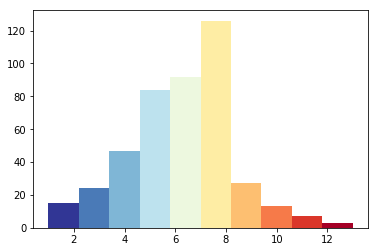

In [5]:
# plot for class 1 

%matplotlib inline  
import matplotlib.pyplot as plt

#the colormap
cm = plt.cm.get_cmap('RdYlBu_r')

# plot histogram 
n, bins, patches = plt.hist(label1.iloc[:,1])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

"""
n: the values of the histogram bins, array or list of arrays
bins: the edges of the bin, length nbins + 1
patches: list of list of lists

"""
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

# iterate over the list of patches to set the color 
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show

<function matplotlib.pyplot.show>

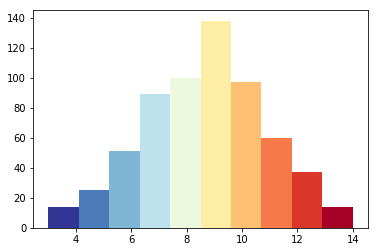

In [6]:
# plot for class 2

%matplotlib inline  
import matplotlib.pyplot as plt

#the colormap
cm = plt.cm.get_cmap('RdYlBu_r')

# plot histogram 
n, bins, patches = plt.hist(label2.iloc[:,1])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

"""
n: the values of the histogram bins, array or list of arrays
bins: the edges of the bin, length nbins + 1
patches: list of list of lists

"""
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

# iterate over the list of patches to set the color 
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show

<function matplotlib.pyplot.show>

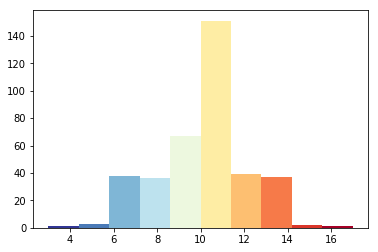

In [7]:
# plot for class 3

%matplotlib inline  
import matplotlib.pyplot as plt

#the colormap
cm = plt.cm.get_cmap('RdYlBu_r')

# plot histogram 
n, bins, patches = plt.hist(label3.iloc[:,1])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

"""
n: the values of the histogram bins, array or list of arrays
bins: the edges of the bin, length nbins + 1
patches: list of list of lists

"""
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

# iterate over the list of patches to set the color 
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show

<function matplotlib.pyplot.show>

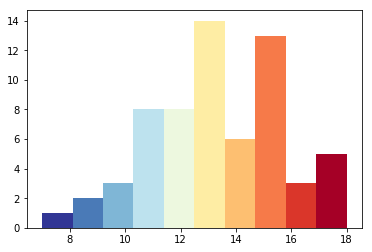

In [8]:
# plot for class 4

%matplotlib inline  
import matplotlib.pyplot as plt

#the colormap
cm = plt.cm.get_cmap('RdYlBu_r')

# plot histogram 
n, bins, patches = plt.hist(label4.iloc[:,1])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

"""
n: the values of the histogram bins, array or list of arrays
bins: the edges of the bin, length nbins + 1
patches: list of list of lists

"""
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

# iterate over the list of patches to set the color 
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show

<function matplotlib.pyplot.show>

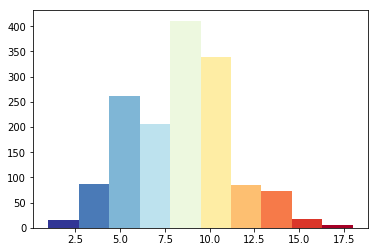

In [9]:
# plot histogram with colors taken from colormap 

%matplotlib inline  
import matplotlib.pyplot as plt

#the colormap
cm = plt.cm.get_cmap('RdYlBu_r')

# plot histogram 
n, bins, patches = plt.hist(train.iloc[:,1])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

"""
n: the values of the histogram bins, array or list of arrays
bins: the edges of the bin, length nbins + 1
patches: list of list of lists

"""
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

# iterate over the list of patches to set the color 
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show

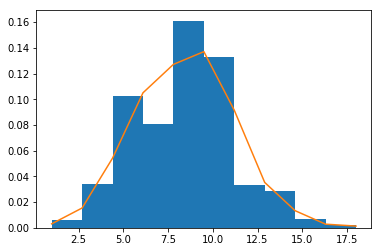

In [10]:
# with probability density line 

%matplotlib inline  
import scipy.stats as stats
import matplotlib.pyplot as plt

density = stats.gaussian_kde(train.iloc[:,1])
n, bins, patches = plt.hist(train.iloc[:,1], density=True)
plt.plot(bins, density(bins))

plt.show()

Regardless of our results from question 1, we will assume all distributions really are Gaussian for the rest of this assignment.

### Question 2: learnMean 

Write a function called *learnMean* that takes in the training set (the full trainData matrix) and a class number, and returns the learned mean amountAlcohol for that class. Specifically, the function will be called as:

                              learnMean(Data, classNum)
                               
where Data is a numpy array with shape/size [N,2] (where N is the number of data points) and classNum is a single number, the function will return a single number.

                  learnMean(np.array([[1,3],[2,5],[1,9],[2,10]]) , 2)
                        
would return 7.5 ( (10+5)/2 )

In [ ]:
import numpy as np

# convert train and test to numpy array
trainData = np.array(trainData)
trainData

In [8]:
def learnMean(Data, classNum):
    """
    Data: a numpy array with shape/size[N, 2]
    classNum: a single integer
    output: a single number of the mean of this class 
    """
    # slice rows when column[0] = class label 
    sub = Data[Data[:,0] == classNum]
    
    # sum amountAlcohol by column, then slice to get sumAlc
    # average over the number of people in this class
    sumAlc = sub.sum(axis=0)[1]
    numPeople = len(sub)
    meanAlc = sumAlc/numPeople
    
    return meanAlc    

In [14]:
# test case 

test1 = np.array([[1,3], [2,5], [1,9], [2,10]])
classNum = 2
learnMean(test1, classNum)

7.5

**Assume a standard deviation of $\sigma$ = 2** <br>

### Question 3: Maximum Likelihood Classifier

Write a function called labelML that takes in an amountAlcohol measurement and a vector containing the mean amountAlcohol values for the four shopper classes. labelML then will return the Maximum Likelihood class for the input amountAlcohol measurement. Specifically, it will be called as: 

                              labelML(amountAlc, meanVector)
 
where *amountAlc* is a single number and *meanVector* is the numpy array with shape/size [1,4] and with contents [$\mu_{minor}$, $\mu_{YoungAdult}$, $\mu_{Adult}$, $\mu_{Senior}$]. The function will return a single character, M, Y, A, or S, for the most likely class.



In [7]:
import math 
import numpy as np

def labelML(amountAlc, meanVector):
    """
    amountAlc: integer, an amountAlcohol measurement
    meanVector: a vector, the mean amountAlcohol values for the four shopper classes 
    output: a single character among {M, Y, A, or S} for the most likely class
    """

    # 1) caculate the variance of data: std = 2
    variance = 2 ** 2
    label = np.array(['M', 'Y', 'A', 'S'])
    dic = dict(zip(label, meanVector))
    
    # 2) get the PDF of each label 
    # 3) compare the PDF and return the largest one
    for key, value in dic.items():
        exponent = math.exp(-(math.pow(amountAlc - value, 2) / (2 * variance)))
        dic[key] = ((1/(math.sqrt(2 * math.pi * variance))) * exponent)
        label = max(dic, key=dic.get)
        
    return label
       

In [12]:
# test case: return S

meanVector = np.array([1, 3, 8, 5])
amountAlc = 6
a = labelML(amountAlc, meanVector) 
a

'S'

Let us assume the prior probabilities for the shopper classes are: 
* P(y=Minor)=0.3
* P(y=Young- adult)=0.4
* P(y=middle-aged-Adult)=0.2
* P(y=Senior-citizen)=0.1

### Question 4: Maximum Posterior Classifier

Write a function called labelMP that takes in an amountAlcohol measurement, a vector containing the mean amountAlcohol values for the four shopper classes, and a vector containing the shopper prior probabilities. labelMP then will return the Maximum Posterior probability (Bayes) label for the input amountAlcohol measurement. Specifically, it will be called as:

                    labelMP(amountAlc, meansVector, priorVector)

where *amountAlc* is a single number, *meanVector* is the numpy array with shape/size [1,4] and with contents [$\mu_{minor}$, $\mu_{YoungAdult}$, $\mu_{Adult}$, $\mu_{Senior}$]. and priorVector is the numpy array with shape/size [1,3] and with contents [𝑃(𝑦 = 𝑀𝑖𝑛𝑜𝑟), 𝑃(𝑌 = 𝑌𝑜𝑢𝑛𝑔𝐴𝑑𝑢𝑙𝑡), 𝑃(𝑌 = 𝐴𝑑𝑢𝑙𝑡)].

The function will return a single character, M, Y, A, or S, for the most probable class.

In [6]:
import math 

def labelMP(amountAlc, meanVector, priorVector):
    """
    amountAlc: integer 
    meanVector: numpy array with shape/size [1,4]
    priorVector: numpy array
    output: a single character, M, Y, A, or S, for the most probable class
    """
    
    # 1. caculate the variance of data: std = 2
    # 2. get the PDF of each label 
    # 3. compare PDF and return the largest one
    
    variance = 2 ** 2
    label = np.array(['M', 'Y', 'A', 'S'])
    dicMean = dict(zip(label, meanVector))
    dicPrior = dict(zip(label, priorVector))

    dicPDF = {}
    for key, value in dicMean.items():
        exponent = math.exp(-(math.pow(amountAlc - value, 2) / (2 * variance)))
        result = ((1/(math.sqrt(2 * math.pi * variance))) * exponent)
        dicPDF[key] = result

    dicBayes = {}
    for key, value in dicPrior.items():  
        if key in dicPDF:
            dicBayes[key] = dicPrior[key] * dicPDF[key]

    label = max(dicBayes, key=dicBayes.get)
    
    return label

In [50]:
meanVector = np.array([1, 3, 8, 5])
priorVector = np.array([0.3, 0.4, 0.2, 0.1])
amountAlc = 6

labelMP(amountAlc, meanVector, priorVector)

'Y'

For questions 5 and 6 below, recall the following class labels in hw1data.mat: 
* minor - 1
* young adult/teen - 2
* middle-aged adult - 3
* senior citizen - 4

The outputs of labelML and labelMP are letters instead: M, Y, A, and S.

### Question 5: evaluateML

Write a function called evaluateML that takes in all the test data (as a matrix) and the class amountAlcohol means (as a vector), and outputs the fraction of correctly-labeled data points in the test set. (The fraction will be a decimal number between 0.0 and 1.0, e.g., 0.65.) Specifically, it will be called as:

                            evaluateML(testData, meanVector)

where testData is a numpy array of size/shape [N,2] and meanVector is the numpy array with shape/size [1,4] and with contents [$\mu_{minor}$, $\mu_{YoungAdult}$, $\mu_{Adult}$, $\mu_{Senior}$]. 
The function will return a single number between 0 and 1.

In [17]:
testData

array([[ 1,  4],
       [ 2,  8],
       [ 3,  6],
       ...,
       [ 3, 11],
       [ 1,  7],
       [ 3, 11]], dtype=uint8)

In [5]:
import pandas as pd 
    
def evaluateML(testData, meanVector):
    """
    testData: a numpy array of size/shape [N,2] 
    meanVector: the numpy array with shape/size [1,4] 
    output: the fraction of correctly-labeled data points in the test set [0,1]
    """
    
    # 1. predict the label for all the test data 
    # 2. compare the label of all the test data with their true label 
    # 3. calculate the % of correct labels 
    
    test = pd.DataFrame(testData).rename(index=str, columns={0:"label", 1:"amountAlcohol"})
    labelDic = {1: 'M', 2: 'Y', 3: 'A', 4: 'S'}
    test['label2'] = [labelDic[x] for x in test.label]

    predict = []
    for i in test['amountAlcohol']:
        predict.append(labelML(i, meanVector))
    test['predict'] = predict

    test['true'] = np.where((test['predict'] == test['label2']), 1, 0)
    accuracy = len(test[test['true'] == 1])/len(test['true'])
    
    return accuracy


In [52]:
# test case: return S

meanVector = np.array([1, 3, 8, 5])
a = evaluateML(testData, meanVector) 
a

0.2633333333333333

### Question 6: evaluateMP

Write a function called evaluateMP that takes in all the test data (as a matrix), the class amountAlcohol means (as a vector), and the class priors (as a vector), and outputs the fraction of correctly-labeled data points in the test set. (The fraction will be a decimal number between 0.0 and 1.0, e.g., 0.65.) Specifically, it will be called as:

                    evaluateMP(testData, meanVector, priorVector)

where testData is a numpy array of size/shape [N,2] , meanVector is the numpy array with shape/size [1,4] and with contents [$\mu_{minor}$, $\mu_{YoungAdult}$, $\mu_{Adult}$, $\mu_{Senior}$], and priorVector is the numpy array with shape/size [1,3] and with contents [𝑃(𝑦 = 𝑀𝑖𝑛𝑜𝑟), 𝑃(𝑌 = 𝑌𝑜𝑢𝑛𝑔𝐴𝑑𝑢𝑙𝑡), 𝑃(𝑌 = 𝐴𝑑𝑢𝑙𝑡)] . The function will return a single number between 0 and 1.

In [4]:
def evaluateMP(testData, meanVector, priorVector):
    """
    testData: a numpy array of size/shape [N,2] 
    meanVector: a numpy array with shape/size [1,4] 
    priorVector: a numpy array with shape/size [1,3]
    output: the fraction of correctly-labeled data points in the test set [0,1]
    """
    
    # 1. predict the label for all the test data 
    # 2. compare the label of all the test data with their true label 
    # 3. calculate the % of correct labels 
    
    test = pd.DataFrame(testData).rename(index=str, columns={0:"label", 1:"amountAlcohol"})
    labelDic = {1: 'M', 2: 'Y', 3: 'A', 4: 'S'}
    test['label2'] = [labelDic[x] for x in test.label]

    predict = []
    for i in test['amountAlcohol']:
        predict.append(labelMP(i, meanVector, priorVector))
    test['predict'] = predict

    test['true'] = np.where((test['predict'] == test['label2']), 1, 0)
    accuracy = len(test[test['true'] == 1])/len(test['true'])
    
    return accuracy  

In [54]:
# test case: return S

meanVector = np.array([1, 3, 8, 5])
priorVector = np.array([0.3, 0.4, 0.2, 0.1])
amountAlc = 6
a = evaluateMP(testData, meanVector, priorVector)
a

0.2941666666666667

### Question 7: Different Training Size

Report the percent of correctly labeled test data for max likelihood and max posterior separately when means are learned:
1. on the first 6 data points in the training set,
2. on the first 18 data points,
3. on the first 54 data points,
4. on and the first 162 data points.

In [12]:
priorVector = np.array([0.3, 0.4, 0.2, 0.1])
trainData

array([[ 3, 10],
       [ 4, 12],
       [ 4, 13],
       ...,
       [ 3,  9],
       [ 3, 12],
       [ 1,  7]], dtype=uint8)

#### 1) means are learned on the 1st 6 data points in the training set

In [78]:
train6 = trainData[0:6]
train6

array([[ 3, 10],
       [ 4, 12],
       [ 4, 13],
       [ 2,  9],
       [ 1,  3],
       [ 2, 11]], dtype=uint8)

In [79]:
mean6 = []
for i in range(1,5):
    mean6.append(learnMean(train6, i))

mean6

[3.0, 10.0, 10.0, 12.5]

In [80]:
evaluateML(train6, mean6)

0.8333333333333334

In [81]:
evaluateMP(train6, mean6, priorVector)

0.5

#### 2) means are learned on the 1st on the first 18 data points

In [82]:
train18 = trainData[0:18]
mean18 = []
for i in range(1,5):
    mean18.append(learnMean(train18, i))

mean18

[4.25, 8.777777777777779, 10.333333333333334, 12.5]

In [83]:
evaluateML(train18, mean18)

0.8888888888888888

In [84]:
evaluateMP(train18, mean18, priorVector)

0.7777777777777778

#### 3) means are learned on the 1st on the first 54 data points

In [9]:
train54 = trainData[0:54]
mean54 = []
for i in range(1,5):
    mean54.append(learnMean(train54, i))
mean54

[5.714285714285714, 8.04, 10.083333333333334, 13.0]

In [10]:
evaluateML(train54, mean54)

0.6481481481481481

In [13]:
evaluateMP(train54, mean54, priorVector)

0.6481481481481481

#### 4) means are learned on the 1st on the first 162 data points

In [14]:
train162 = trainData[0:162]
mean162 = []
for i in range(1,5):
    mean162.append(learnMean(train162, i))
mean162

[5.627906976744186, 8.458333333333334, 9.948717948717949, 12.75]

In [15]:
evaluateML(train162, mean162)

0.5925925925925926

In [16]:
evaluateMP(train162, mean162, priorVector)

0.6172839506172839

### Question 8: Multiple Features

Consider shopper classification based on both how much alcohol they buy and how much soda they buy:

$\underset{𝒔𝒉𝒐𝒑𝒑𝒆𝒓𝑨𝒈𝒆}{\operatorname{a𝐫𝐠𝐦𝐚𝐱}} 𝑷(𝒔𝒉𝒐𝒑𝒑𝒆𝒓𝑨𝒈𝒆|𝒂𝒎𝒕𝑨𝒍𝒄𝒐𝒉𝒐𝒍,𝒂𝒎𝒕𝑺𝒐𝒅𝒂)$

hw1dataQ8.mat contains expanded data where the first column is subject class (1 through 4), the second column is amtAlcohol, and the third column is amtSoda. </br>

Write a function **labelMP2** to perform Gaussian Naïve Bayes classification based on amtAlcohol and amtSoda. It will classify a single shopper based on her/his alcohol and soda purchases and based on the corresponding likelihoods and priors. Specifically, it will be called as:
    
                     labelMP(amountDrinks, meansMatrix, priorVector)

where amountDrinks is a numpy array with shape/size [1,2] contains [amtAlcohol, amtSoda] for a single shopper, meansMatrix is the numpy array with shape/size [2,4] and with contents

$\left[\begin{array}{cc} 
       \mu_{minor}^{alcohol} & \mu_{YoungAdult}^{alcohol} & \mu_{Adult}^{alcohol} & \mu_{Senior}^{alcohol}\\
       \mu_{minor}^{soda} & \mu_{YoungAdult}^{soda} & \mu_{Adult}^{soda} & \mu_{Senior}^{soda}
       \end{array}\right]$

and *priorVector* is the numpy array with shape/size [1,3] and with contents [𝑃(𝑦 = 𝑀𝑖𝑛𝑜𝑟), 𝑃(𝑌 = 𝑌𝑜𝑢𝑛𝑔𝐴𝑑𝑢𝑙𝑡), 𝑃(𝑌 = 𝐴𝑑𝑢𝑙𝑡)]. 

As in previous questions, we will assume all **likelihood standard deviations are 2, 𝝈 = 𝟐**. The function will return a single character, M, Y, A, or S, for the most probable class. Again, the function is to return the class letter (M, Y, A, or S) with highest probability.

Recall the prior probabilities for the shopper classes are: 
* P(y=Minor)=0.3
* P(y=Young- adult)=0.4
* P(y=middle-aged-Adult)=0.2
* P(y=Senior-citizen)=0.1

In [17]:
import scipy.io

q8 = scipy.io.loadmat('hw1dataQ8.mat')
train8 = q8['trainData']
test8 = q8['testData']
train8

array([[ 3.        , 10.        , 14.229271  ],
       [ 4.        , 12.        ,  6.31721137],
       [ 4.        , 13.        ,  8.77715465],
       ...,
       [ 3.        ,  9.        , 15.91507819],
       [ 3.        , 12.        , 15.47556419],
       [ 1.        ,  7.        ,  8.1045919 ]])

In [18]:
priorVector = np.array([0.3, 0.4, 0.2, 0.1])

In [19]:
trainAlc = train8[:,0:2]
trainAlc

array([[ 3., 10.],
       [ 4., 12.],
       [ 4., 13.],
       ...,
       [ 3.,  9.],
       [ 3., 12.],
       [ 1.,  7.]])

In [20]:
meanAlc = []
for i in range(1,5):
    meanAlc.append(learnMean(trainAlc, i))
meanAlc

[6.093607305936073, 8.6592, 10.053333333333333, 13.253968253968255]

In [21]:
trainSod = train8[:,(0,2)]
trainSod

array([[ 3.        , 14.229271  ],
       [ 4.        ,  6.31721137],
       [ 4.        ,  8.77715465],
       ...,
       [ 3.        , 15.91507819],
       [ 3.        , 15.47556419],
       [ 1.        ,  8.1045919 ]])

In [22]:
meanSod = []
for i in range(1,5):
    meanSod.append(learnMean(trainSod, i))
meanSod

[7.176792173157934, 14.019995524565415, 14.047521984317518, 7.252824211485946]

In [23]:
meansMatrix = np.array([meanAlc, meanSod])
meansMatrix

array([[ 6.09360731,  8.6592    , 10.05333333, 13.25396825],
       [ 7.17679217, 14.01999552, 14.04752198,  7.25282421]])

In [46]:
# subset nparray 
Drinks = train8[:,1:3]
Drinks

array([[10.        , 14.229271  ],
       [12.        ,  6.31721137],
       [13.        ,  8.77715465],
       ...,
       [ 9.        , 15.91507819],
       [12.        , 15.47556419],
       [ 7.        ,  8.1045919 ]])

In [48]:
amountDrinks = Drinks[0]
amountDrinks

array([10.      , 14.229271])

In [89]:
def labelMP2(amountDrinks, meansMatrix, priorVector):
    """
    amountDrinks: a numpy array with shape/size [1,2] contains [amtAlcohol, amtSoda]
    meansMatrix: a numpy array with shape/size [2,4]
    priorVector: numpy array
    output: a single character, M, Y, A, or S, for the most probable class
    """
    
    # 1. caculate the variance of data: std = 2
    # 2. get the PDF of each label of each feature
    # 3. pdf * prior
    
    variance = 2 ** 2
    label = np.array(['M', 'Y', 'A', 'S'])
    mean = pd.DataFrame(meansMatrix).rename(index=str, columns={0:"M", 1:"Y", 2:"A", 3:"S"}).transpose()

    dicPDFAlc = []
    for i in mean['0']:
        exponent = math.exp(-(math.pow(amountDrinks[0] - i, 2) / (2 * variance)))
        result = ((1/(math.sqrt(2 * math.pi * variance))) * exponent)
        dicPDFAlc.append(result)
    mean['pdfAlc'] = dicPDFAlc

    dicPDFSod = []
    for i in mean['1']:
        exponent = math.exp(-(math.pow(amountDrinks[1] - i, 2) / (2 * variance)))
        result = ((1/(math.sqrt(2 * math.pi * variance))) * exponent)
        dicPDFSod.append(result)
    mean['pdfSod'] = dicPDFSod
    
    mean['pior'] = priorVector
    mean['class'] = mean['pior'] * mean['pdfAlc'] * mean['pdfSod']

    label = mean[mean['class'] == max(mean['class'])].index[0]
    
    return label

In [90]:
labelMP2(amountDrinks, meansMatrix, priorVector)

'Y'